### DS102 | Project | Saturday 3.45pm
**Cryptocurrencies, stocks, and data privacy**
<hr>

Group 11 Team Members:
- Lenon Ong
- Sindhu Raghavendra
- Durga Korlaganti
- Huiyin Ang

This Project contains the following:

A. Problem Statement / Research Topic;

B. Datasets Evaluation;

C. Methodology; and

D. Insights / Evaluation

**A. Problem Statement / Research Topic**
- Over the years, there have been much news and developments in personal data protection laws globally. From the European Union’s General Data Protection Regulation to Singapore’s Personal Data Protection Act, there have been improvements in the protection of individuals’ personal data and their legal rights. 


- As technology advances, data is increasingly generated and organisations collect, use, and disclose personal data very frequently today.


- Despite the increasing strengthening of data privacy laws and enforcement actions by the authorities around the world, cases of data breach appear to become increasingly prevalent. 


- In Singapore alone, there have been numerous reported cases of data breach in both public and private organisations; from Singhealth and MINDEF to K Box and WannaCry Ransomware, it is worrying that personal data of individuals are being compromised despite increasing regulations and penalties imposed by the Personal Data Protection Commission. A Russia cyber-security group even found details like usernames and passwords of accounts related to MOH, MOE, Singapore Police, and NUS and payment care details on the dark web.


- On the other hand, the use of blockchain technology globally is also increasingly widespread. While finance offers the strongest use for this technology, the Singapore government has adopted blockchain technology to produce ‘tamper-resistant’ digital certificates for graduates. Outside of Singapore, one of the most common uses of blockchain technology is in cryptocurrencies, where transactions are recorded and payments are facilitated. Bitcoin is amongst the most actively traded cryptocurrencies.


- Blockchain is essentially a digital, decentralised ledger that maintains a record of all transactions which take place in a peer-to-peer network. Once lauded to be a technology that is unhackable, blockchains are in fact susceptible to hacking.


- Given the increasingly strict regulations on personal data protection and increasing adoption of blockchain technology, this Project aims to find any possible correlation between the instances of data breaches and the prices of cryptocurrencies at various points in time.


**B. Dataset Evaluation**

For this project, we have currently selected the following datasets:

- Historical data on data breaches: Data is available between 2004 and 2019;
- Historical data on stock prices: Data is available between 1999 and 2017;
- Historical data on the price of cryptocurrencies: Data is generally available between 2010 and 2018, and varies according to the type of cryptocurrency; and
- Online articles: Articles will be chosen between 2010 and 2018.

The datasets will be obtained from government websites such as data.gov.sg, and other datasets websites which provide datasets in csv format such as Kaggle. We will also be exploring online articles that discuss the susceptibility of blockchains, and apply what we have learnt about natural language processing. 

**1. Historical data on data breaches**

A detailed analysis of the historical data on data breaches in organisations will include the following:

- Data breaches in specific industry sectors;
- Data breaches against year;
- Number of data breaches against the method of data breach;
- Number of lost records against the method of data breach;
- Number of lost records per year; and
- Word cloud of the data breach incidents by organisations, and data breach online (news) articles.
 
**2. Stock price**

We will filter out companies and sectors with incidents of data breaches and analyse whether there is any impact on stock prices. Since the data of stock prices is available for each working day, we will be resampling the data to match the data breach timeline. 
 
**3. Cryptocurrency historical data**

Considering the top ‘n’ most popular cryptocurrencies, we will analyse whether there is any correlation between the value of cryptocurrencies and the timeline of data breach incidents.

**4. Online articles**

We will analyse the emotion and sentiment used in various online articles, which may include the comments by readers, and also draw up a word cloud.


**C. Methodology**


We will first import the relevant libraries.

In [ ]:
!pip install datefinder
!pip install pygrok

In [1]:
import pandas as pd
import nltk
nltk.download("stopwords")
nltk.download("words")
from nltk.corpus import stopwords, words

import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
from scipy.stats import kde
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans

import datefinder
from pandas.core.common import flatten
from wordcloud import WordCloud
from pygrok import Grok
DIMS=(16, 6)

import requests
from bs4 import BeautifulSoup
import urllib

# import import_ipynb
from wordcloud import WordCloud, STOPWORDS

# Display all floats rounded off to 1 decimal place
pd.options.display.float_format = '{:,.2f}'.format
# Plot inline in Jupyter notebook
%matplotlib inline
# Settings throughout the notebook
sns.set()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Sindhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/Sindhu/nltk_data...
[nltk_data]   Package words is already up-to-date!


## Section 1: Cryptocurrency   

### Section 1a: Change in price and transaction count for Bitcoin in detail 

We will now compare the data sets of: 

a. the price of Bitcoin against year, and 

b. Bitcoin's transaction count against year.

The dataset used lies between May 2013 to December 2018.

Each plot represents the closing price of the Bitcoin of that day.

/Users/Sindhu/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


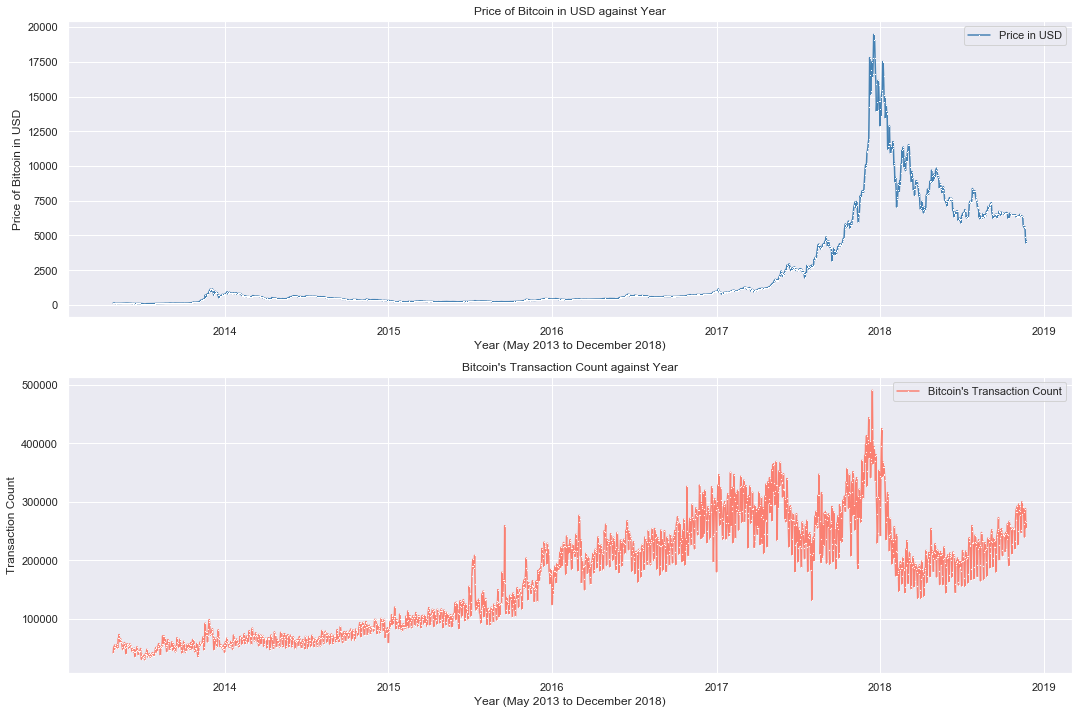

In [2]:
df_bitcoin = pd.read_csv('bitcoin_csv.csv', sep=',')
df_bitcoin1 = df_bitcoin.dropna()
df_bitcoin1_per_year = df_bitcoin1.copy() 
df_bitcoin1_per_year = df_bitcoin1_per_year[['date', 'price(USD)', 'txCount']]
# df1_per_year = df1_per_year.groupby('date')
df_bitcoin1_per_year['date'] = pd.to_datetime(df_bitcoin1_per_year['date'])
df_bitcoin1_per_year.groupby(df_bitcoin1_per_year['date'].dt.year)['price(USD)'].agg(['mean'])
df_bitcoin1_per_year.groupby(df_bitcoin1_per_year['date'].dt.year)['txCount'].agg(['mean'])
df_bitcoin1_per_year = df_bitcoin1_per_year.reset_index()

fig = plt.figure(figsize=(18, 12))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sns.lineplot(x=df_bitcoin1_per_year['date'], y=df_bitcoin1_per_year['price(USD)'], ax=ax1
           ,color="steelblue", marker='x', markersize=0.5)
ax1.set_ylabel("Price of Bitcoin in USD")
ax1.set_xlabel("Year (May 2013 to December 2018)")
ax1.set_title("Price of Bitcoin in USD against Year")
ax1.legend(["Price in USD"])

sns.lineplot(x=df_bitcoin1_per_year['date'], y=df_bitcoin1_per_year['txCount'], ax=ax2
           ,color="salmon", marker='o', markersize=0.5)
ax2.set_ylabel("Transaction Count")
ax2.set_xlabel("Year (May 2013 to December 2018)")
ax2.set_title("Bitcoin's Transaction Count against Year")
ax2.legend(["Bitcoin's Transaction Count"])
plt.show()

From the graphs above, it is difficult to determine any relationship between price of Bitcoin, and Bitcoin's transaction count over the same period.

Thus, to better determine the relationship between these 2 variations, we will be plotting a scatterplot, with the price of Bitcoin as the y-axis, and the transaction count of Bitcoin as the x-axis.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


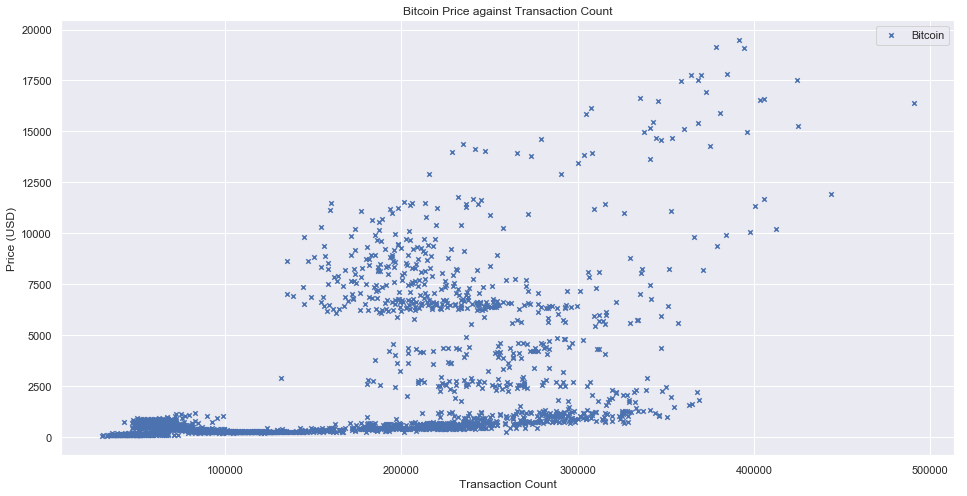

In [3]:
fig = plt.figure(figsize=(16, 8))

ax3 = fig.add_subplot(1,1,1)

df_bitcoin1.plot(kind='scatter', x='txCount', y='price(USD)', marker = 'x', ax=ax3)
ax3.legend(["Bitcoin"])
ax3.set_xlabel("Transaction Count")
ax3.set_ylabel("Price (USD)")
ax3.set_title("Bitcoin Price against Transaction Count")
plt.show()

Given the high density of the scatterplot when Price < USD 2500, we will next plot a 2D density graph to determine the plots with the highest number of occurrences.

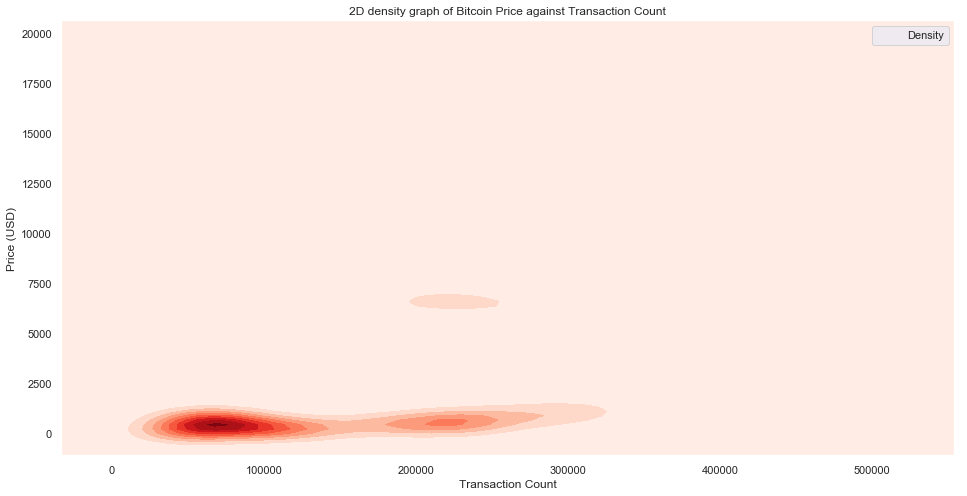

In [4]:
fig = plt.figure(figsize=(16, 8))

ax3 = fig.add_subplot(1,1,1)

sns.kdeplot(df_bitcoin1['txCount'], df_bitcoin1['price(USD)'], cmap="Reds", shade=True)
ax3.set_xlabel('Transaction Count')
ax3.set_ylabel('Price (USD)')
plt.title('2D density graph of Bitcoin Price against Transaction Count')
ax3.legend(['Density'])

plt.show()

We will now using Linear Regression to determine the correlation between Price of Bitcoin and Transaction Count.

Linear regression attempts to model the relationship between two variables by fitting a linear equation. This does not necessarily imply that one variable causes the other, but there might be some correlation between the two variables.

In [5]:
X = df_bitcoin1_per_year[['txCount']]
y = df_bitcoin1_per_year['price(USD)']

# Create the Model
model = sm.OLS(y,X)

# Train the model on the training set
results = model.fit()

# Print the summary results
display(results.summary())

# If R-squared approaches 1, means v strong correlation

df_bitcoin1_per_year['fitted_bitcoin'] = results.fittedvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price(USD)   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1831.
Date:                Fri, 14 Jun 2019   Prob (F-statistic):          6.91e-286
Time:                        20:56:32   Log-Likelihood:                -19177.
No. Observations:                2035   AIC:                         3.836e+04
Df Residuals:                    2034   BIC:                         3.836e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
txCount        0.0149      0.000     42.793      0.000       0.014       0.016
==============================================================================
Omnibus:                      646.446   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1720.349
Skew:                           1.697   Prob(JB):                         0.00
Kurtosis:                       5.961   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


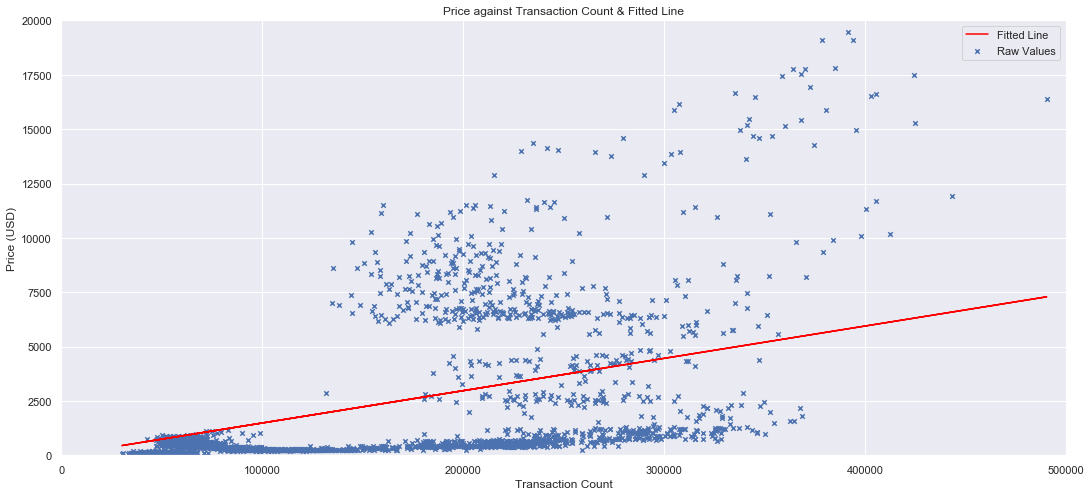

In [6]:
fig = plt.figure(figsize=(18,8))
ax4 = fig.add_subplot(111)

# Exercise: Plot the scatterplot for FloorArea and SalePrice
#
df_bitcoin1_per_year.plot(kind='scatter', x='txCount', y='price(USD)', marker = 'x', ax=ax4)
df_bitcoin1_per_year.plot(kind='line', x='txCount', y='fitted_bitcoin', ax=ax4, color='red')

# Additional parameters are given to you.
ax4.set_title("Price against Transaction Count", fontsize=14)
ax4.set_xlabel("Transaction Count")
ax4.set_ylabel("Price (USD)")
ax4.legend(['Fitted Line', 'Raw Values'])
ax4.set_title("Price against Transaction Count & Fitted Line")
ax4.set_xlim(0, 500000, 250)
ax4.set_ylim(0, 20000, 25000)

plt.show()

**Evaluation on the relationship between the price of Bitcoin against transaction count**

The R-squared value is 0.474, and the R-squared value explains to what extent the variance of one variable explains the variance of the second variable. Slightly less than half of the observed variation can be explained by the model's inputs.

Thus, it is safe to assume that the price of Bitcoin can be affected by various factors such as the consumers' perceived value, and confidence in the security of blockchain technology.

### Section 1b:  General trend of the price of cryptocurrencies in recent years

In [7]:
df_ether_price = pd.read_csv('ethereum_price.csv', sep=',')
df_ether_price_drop = df_ether_price.dropna()

df_bitcoin2 = pd.read_csv('bitcoin_price.csv', sep=',')
df_bitcoin2_drop = df_bitcoin2.dropna()

df_litecoin_price = pd.read_csv('litecoin_price.csv', sep=',')
df_litecoin_price_drop = df_litecoin_price.dropna()

df_ether_X = df_ether_price[['Close', 'Volume', 'Market Cap']]
df_bitcoin_Y = df_bitcoin2[['Date', 'Close', 'Volume', 'Market Cap']]
df_litecoin_Z = df_litecoin_price[['Close', 'Volume', 'Market Cap']]

df_crypto_Z = df_bitcoin_Y.copy()
df_crypto_Z.rename(columns={'Close': 'Bitcoin Closing Price'}, inplace=True)
df_crypto_Z.rename(columns={'Volume': 'Bitcoin Volume'}, inplace=True)
df_crypto_Z.rename(columns={'Market Cap': 'Bitcoin Market Cap'}, inplace=True)
df_crypto_Z['Ethereum Closing Price'] = df_ether_X['Close']
df_crypto_Z['Ethereum Volume'] = df_ether_X['Volume']
df_crypto_Z['Ethereum Market Cap'] = df_ether_X['Market Cap']
df_crypto_Z['Litecoin Closing Price'] = df_litecoin_Z['Close']
df_crypto_Z['Litecoin Volume'] = df_litecoin_Z['Volume']
df_crypto_Z['Litecoin Market Cap'] = df_litecoin_Z['Market Cap']

df_crypto_Z = df_crypto_Z.fillna(0)

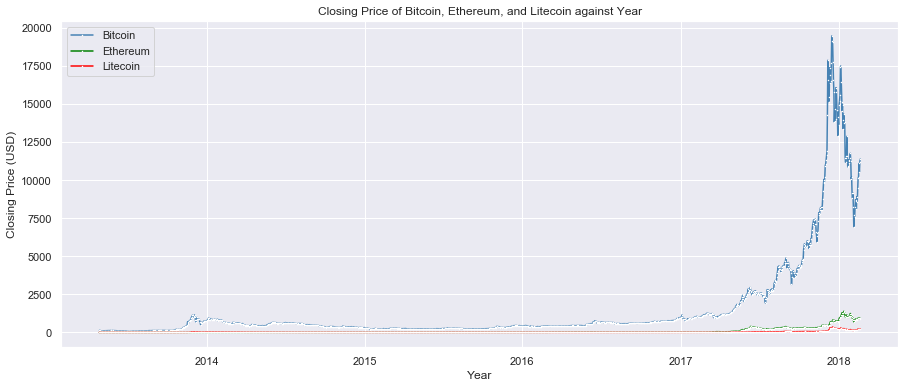

In [8]:
df_crypto_Z['Date'] = pd.to_datetime(df_crypto_Z['Date'])
df_crypto_Z.groupby(df_crypto_Z['Date'].dt.year)['Bitcoin Closing Price'].agg(['mean'])

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1,1,1)

sns.lineplot(x=df_crypto_Z['Date'], y=df_crypto_Z['Bitcoin Closing Price'], ax=ax1
           ,color="steelblue", marker='o', markersize=0.7)
sns.lineplot(x=df_crypto_Z['Date'], y=df_crypto_Z['Ethereum Closing Price'], ax=ax1
           ,color="green", marker='o', markersize=0.7)
sns.lineplot(x=df_crypto_Z['Date'], y=df_crypto_Z['Litecoin Closing Price'], ax=ax1
           ,color="red", marker='o', markersize=0.7)
ax1.set_ylabel("Closing Price (USD)")
ax1.set_xlabel("Year")
ax1.set_title("Closing Price of Bitcoin, Ethereum, and Litecoin against Year")

ax1.legend(["Bitcoin", "Ethereum", "Litecoin"])


plt.show()

From the graph above, it can be observed that the price of popular cryptocurrencies such as Bitcoin, Ethereum, and Litecoin rose from around 2017 onwards, and had significant fluctuations in 2017 and 2018. From 2013 to 2017, prices of these cryptocurrencies were relatively stagnant.

### Section 1c: 
In this section, we use the Web scraping concepts to extract data from blogs/news articles to build a  database of breaches related to cryptocurrency and also run text analysis on other blogs.

The motivation for taking up this is because of the following:
1. We did not find a dataset specific to cryptocurrency breaches. However, we found relevant news articles listing the top 10 breaches in 2018 in the crypto field.
2. We wanted to compare the text analysis of crypto breaches vs data breaches.

To achieve this, we have used these sources:

1. To build database: https://www.immuniweb.com/blog/top-ten-most-disastrous-cryptocurrency-breaches-in-2018.html
https://resources.infosecinstitute.com/security-vulnerabilities-of-cryptocurrency-exchanges/#gref


2. For Wordclouds: 

Article 1 - HACK BRIEF: HACKERS STOLE $40 MILLION FROM BINANCE CRYPTOCURRENCY EXCHANGE (https://www.wired.com/story/hack-binance-cryptocurrency-exchange/)

Article 2 - Nearly $400 million lost, stolen from sales of new digital coins, Ernst & Young says (https://www.cnbc.com/2018/01/22/nearly-400-million-lost-stolen-from-sales-of-new-digital-coins.html) 


In [9]:
# Source 1: Credits at the end of the notebook
url1 = "https://www.immuniweb.com/blog/top-ten-most-disastrous-cryptocurrency-breaches-in-2018.html"
# Use requests.get(url) to send a request to the server and get the contents. Store it in resp
#
resp = requests.get(url1)

soup = BeautifulSoup(resp.text, 'html.parser')

In [10]:
# Extract h3 tags and store in a list

h3_text = []
# extract info from the widgets
h3_tag = soup.find_all('h3')
for t in h3_tag:
    tt = t.text
    tt = re.sub("[0-9]+\.","",tt)
    h3_text.append(tt.strip())
h3_text = h3_text[:10]
print(h3_text)

['Bee Token', 'Taylor', 'Verge (Twice)', 'Coinsecure', 'Bancor', 'Bithumb', 'Coinrail', 'Zaif', 'BitGrail', 'Coincheck']


In [11]:
# Extract the loss value in currency from the text description
def extractLossValueFromString(loss_list):
    lossValue =[]
    num = ''
    den = ''
    n = 0
    for s in loss_list:
        #print(s)
        n = 0
        loss_str = re.sub(',', '', s)
        result = re.search('\d+\.\d+ million|\d+ million',loss_str) 
        if (len(result.group()) > 1):
            [num, den] = result.group().split()
        lossValue.append(float(num))
    
    return(lossValue)

In [12]:
# Extract details from the text part of different tags
def extractDataForDF(p_tag):    
    count = 0
    p_new = []
    p_last = []
    full_story = [] 
    fs = ''

    # Extract the data before the useful information and remove it from the p_tag list
    for p in p_tag:
        if 'When:' in p.text :
            break
        else:
            p_new.append(p)

    for x in p_new:
        p_tag.remove(x)

    # Extract the trailing texts (there are 12 - manually checked) and remove from main p_tag     
    tagsToexclude = len(p_tag) - 12
    for i in range(tagsToexclude):
        p_last.append(p_tag[i].text) 

    #print("*********************")
    # Seggregate the contents into separate lists
    for p in p_last:  
        if 'When:' in p:
            p = re.sub('When:','', p)
            # Extract only month as the entire dataset is for 2018
            p = re.sub('2018.','', p)
            p = re.sub('2018','', p)
            p_when.append(p.strip()) 

            if (count > 0):
                # Copy the concatenated story here 
                fs = ' '.join(full_story)
                p_story.append(fs)
                full_story = []
            count += 1
        elif 'What was lost:' in p:
            p = re.sub('What was lost: ', '', p)
            p_what.append(p.strip())
        elif 'How:' in p:
            p = re.sub('How:', '', p)
            p_how.append(p.strip())
        else:
            full_story.append(p)

    # append the last story
    fs = ' '.join(full_story)
    p_story.append(fs)

In [13]:
# Map breach method with keywords used in the description of methods
def extractBreachMethod(how):
    breachTechniques = ['phishing', 'hack', 'direct theft', 'insider theft', 'security', 
                        'blockchain vulnerability', 'compromised wallet', 'cyber intrusion',
                        'employee PC', 'protocol flaw' ]
    breachKeyword = ['phishing', 'hack', 'direct', 'insider', 'security', 
                        'blockchain', 'wallet', ' intrusion',
                        'PC', 'protocol' ]
    method = []
    for m in how:
        for t in breachKeyword:
            if t.lower() in m.lower():
                break
        method.append(breachTechniques[breachKeyword.index(t)])
    return (method)

In [14]:
# Extract correcponding p tags
p_story = []
p_when = []
p_what = []
p_how = []

p_tag = soup.find_all('p')

# Extract other useful information from the p tags
extractDataForDF(p_tag)
p_lossValue = extractLossValueFromString(p_what)
p_method = extractBreachMethod(p_how)


In [15]:
# Create a dataframe from all the extracted data        
superList = []
superList = list(zip(h3_text, p_when, p_what, p_lossValue, p_how, p_method, p_story))
df_crypto = pd.DataFrame(superList, columns = ['Entity', 'When' , 'Loss', 'Loss Value in $', 'Method description', 'Method', 'Story'])
# Write the data to a csv file
df_crypto.to_csv('cryptoBreach2018.csv', index=False, sep = '|')

# For plotting
df_new = df_crypto[['Method', 'Loss Value in $']]
df_new = df_new.groupby('Method')['Loss Value in $'].sum()
df_new = df_new.reset_index()
df_new.columns = pd.Index(['Method','Total Loss in million $'])



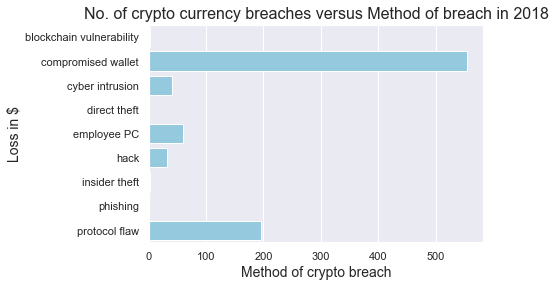

In [16]:
fig, ax3 = plt.subplots()
sns.barplot(y=df_new['Method'], x=df_new['Total Loss in million $'], ax=ax3, color="skyblue")
ax3.set_xlabel('Method of crypto breach', fontsize=14)
#plt.xticks(rotation=90)
ax3.set_ylabel('Loss in $', fontsize=14)
ax3.set_title("No. of crypto currency breaches versus Method of breach in 2018", fontsize=16)
plt.show()
    

In [46]:
# *********************************** #
def getWords(storyList):
    wordsList = []
    s1 = []
    s2 = []

    for s in storyList: 
        # Remove any special characters and numbers
        s1 = re.sub('[^a-zA-Z \n]', '', s)
        # Convert to lower case, remove leading and trailing spaces
        s1 = s1.strip().lower()
        
        # split all the stories into independent words
        s2.append(s1.split())
        wordsList = list(flatten(s2))
        
    return wordsList

# *********************************** #
def getUniqueStoryWords(words_unique):
    
    story_words = ''
    sWords = []
    
    # Remove all stop words described in the nltk stopword list for English
    # convert the list of unique words to pandas dataframe to check for stopwords
    df_words = pd.DataFrame(words_unique)
    df_words.columns = ['Unique Words']
    engStopWords = stopwords.words('english')
    df_story_words = df_words[~df_words['Unique Words'].isin(engStopWords)]
    
    # Convert the df column to a long string of words
    sWords = df_story_words['Unique Words'].tolist()
    #print(sWords)
    
    # Create a long string of all words in the list    
    for w in sWords:
        #simple string concatenation
        story_words = story_words + ' ' + w

    return story_words

# *********************************** #

In [18]:
# Extract all the stories into a series and convert it into a list
df_crypto_story = df_crypto.copy()
storyList = df_crypto_story['Story'].tolist()

# Replace all special characters with '' and create a long string concatenating all stories
wordsList = getWords(storyList)

onlyWords = getUniqueStoryWords(wordsList)


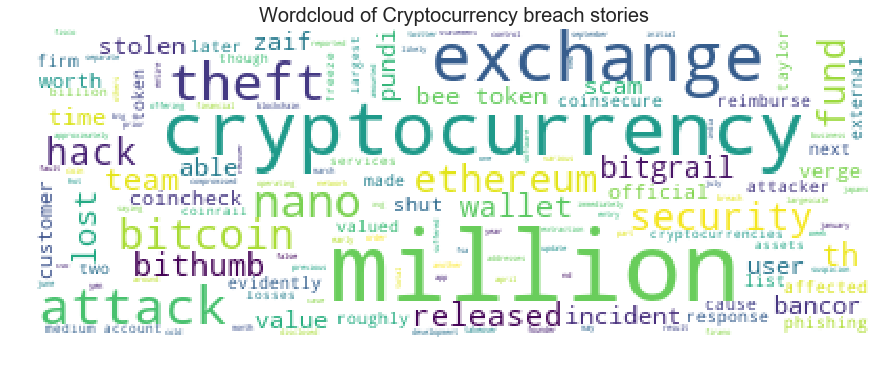

In [19]:
plt.figure(figsize=(15,8))
desc_wordcloud = WordCloud(
    width=400, height=150,
    background_color="white", 
    max_words=150, relative_scaling = 1.0).generate(onlyWords)
plt.imshow(desc_wordcloud)
plt.axis("off")
plt.title("Wordcloud of Cryptocurrency breach stories", fontsize=20)
plt.show()

In [20]:
# Article1 - HACK BRIEF: HACKERS STOLE $40 MILLION FROM BINANCE CRYPTOCURRENCY EXCHANGE
url1 = "https://www.wired.com/story/hack-binance-cryptocurrency-exchange/"

# Article2 - Nearly $400 million lost, stolen from sales of new digital coins, Ernst & Young says
url2 = "https://www.cnbc.com/2018/01/22/nearly-400-million-lost-stolen-from-sales-of-new-digital-coins.html"

# Get the contents. 
resp1 = requests.get(url1)
resp2 = requests.get(url2)

#Retrieval
soup1 = BeautifulSoup(resp1.text, 'html.parser')
soup2 = BeautifulSoup(resp2.text, 'html.parser')

#print(soup1.prettify())

#### Article 1's Wordcloud

In [21]:
# Article 1
lede = soup1.find('article', attrs={'class' : 'article-body-component article-body-component--security'})

# print(lede)
lede_div = lede.find('div')
#print (lede_div.text)
lists = lede_div.find_all ('p')
#print (lists)

str1 = ""
for list in lists:
    info1= list.text
    str1+=info1

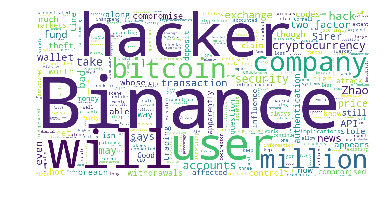

In [22]:
STOPWORDS.update(["see","common"])


bin_wordcloud = WordCloud(width=1000, height=500, max_words=400, 
                      stopwords=STOPWORDS, background_color= "white", 
                      random_state=42).generate(str1)
plt.imshow(bin_wordcloud)
plt.axis("off")
plt.show()

#### Article 2's Wordcloud

In [23]:
# Article 2 
group = soup2.find('div', attrs={'class' : 'ArticleBody-articleBody'})

group_div = group.find_all('p')
#print(group_div)

str2 = ""
for s in group_div: 
    info2 = s.text
    str2 += info2

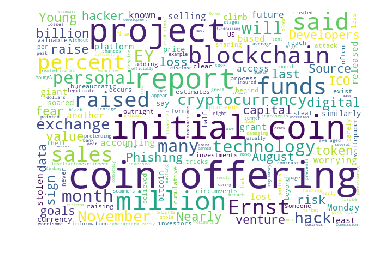

In [24]:
STOPWORDS.update(["see","common"])


digic_wordcloud = WordCloud(width=600, height=400, max_words=400, 
                      stopwords=STOPWORDS, background_color= "white", 
                      random_state=42).generate(str2)
plt.imshow(digic_wordcloud)
plt.axis("off")
plt.show()

#### Observations:
- The loss in value runs in millions of dollars due to breaches in, and attacks on, blockchain technology.
- Hacking seems to be one of the main methods of breach since words like "hacking", "attack", and "theft" appear frequently.
- All cryptocurrencies and their respective blockchain technologies seem to be vulnerable.


## Section 2: Data breaches
### Section 2a: 
In this section, we look into the data breach datasets and also run text analysis on some blogs 

The following plots will be looked into:
- 1. Number of lost records per year, number of breaches per year; and
- 2. Number of lost records per sector

In [25]:
## Methods used in this section

def covertToNumber(record):
    # Remove all commas
    rec = re.sub(',','',record)
    # Convert to float
    num = float(rec)
    return num

# *********************************** #
def cleanData(df):   
    # drop the first row
    df.drop([0], axis=0, inplace=True)
    
    # Drop the columns that are not required
    df.drop(['alternative name', 'interesting story', 'DATA SENSITIVITY',  'DISPLAYED RECORDS', 'Unnamed: 10', '1st source link' , '2nd source link'], axis=1, inplace=True)
    
    # drop rows that are blank in the columns of interest
    df.dropna(inplace=True)
    # Convert the 'records lost' string to numerical values
    df['records lost'] = df['records lost'].apply(covertToNumber)

# *********************************** #
def extractAndStripDateFromStory(df):    
    stories = df['story'].tolist()
    date_pattern = '%{MONTH:month} %{YEAR:year}'
    p = ''
    month = []
    story = []
    
    for s in stories:
        grok = Grok(date_pattern)   
        d = grok.match(s)    
        dt = p.join(d['month'] + " " + d['year'] + ".") 
        m = d['month']
        month.append(m)    
        st = re.sub(dt, '', s) 
        story.append(st)       
    df['story'] = story
    df['Month'] = month
    

In [26]:
# Data cleanup
# Drop the first row From 'story' column, extract pattern into another column called 'Month Year'.
df = pd.read_csv('Balloon_Race_Data_Breaches.csv', encoding='latin-1')

# Clean data
cleanData(df)
# Extract Month from story into a column
# Extract only story into story column
extractAndStripDateFromStory(df)


### Data visualisation plots
Plotting 2 graphs below: (1) data breaches per year, and (2) number of data records lost per year.

In [27]:
# 1. Plot of number of lost records per year, number of breaches per year
# 2. Plot of number of lost records per sector
yearRange = ['2015', '2016','2017', '2018', '2019']
df_per_year = df.copy()
df_per_year = df_per_year[['records lost', 'YEAR']]

df_per_year = df_per_year.groupby('YEAR').agg({'records lost': ['sum', 'size']}) 
df_per_year = df_per_year.reset_index()
df_per_year.columns = pd.Index(['Year', 'Total Records Lost', 'Number of Breaches'])

# 2. Plot of number of breaches per sector
df_per_sector = df.copy()
df_per_sector = df_per_sector[['YEAR', 'SECTOR', 'records lost']]
#df_per_sector = df_per_sector.groupby('SECTOR').size()
df_per_sector = df_per_sector.groupby(['YEAR','SECTOR']).size().reset_index(name='Number of breaches')
df_per_sector_5yr = df_per_sector[df_per_sector['YEAR'].isin(yearRange)]

# Create the term_grade_loans_pivot where the index is grade and the columns are the different terms
data_breach_pivot = pd.pivot_table(df_per_sector_5yr, index='SECTOR', columns='YEAR',
                                       values='Number of breaches', aggfunc=np.sum, fill_value = 0)

#### Plotting bar chart - for number of breaches per sector in the past 5 years

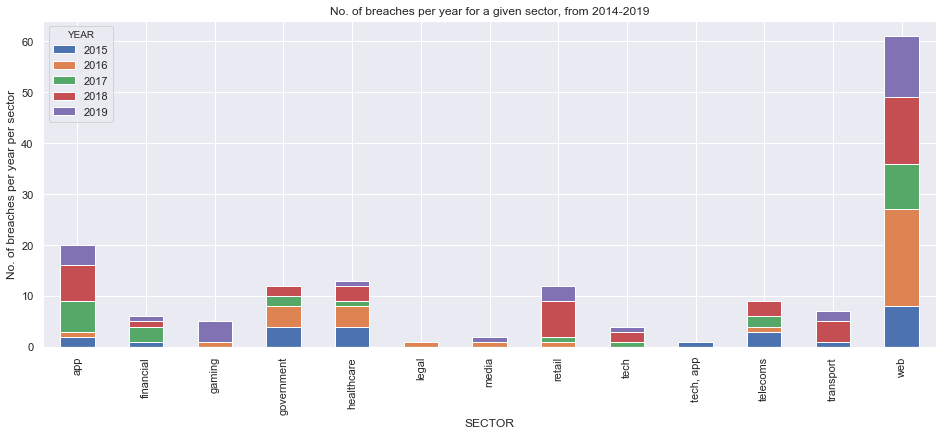

In [28]:
DIMS=(16, 6)
fig, ax1 = plt.subplots()

data_breach_pivot.plot(kind='bar', stacked=True, 
                                  figsize=DIMS, title="No. of breaches per year for a given sector, from 2014-2019",
                                   ax=ax1)
ax1.set_ylabel("No. of breaches per year per sector")
plt.show()

- 2018 saw the most number of data breaches in many of the sectors.
- Cumulatively, Web has been the sector that is the most vulnerable to data breaches. 

#### Plotting the number of breaches vs method of breach

In [29]:
df_method = df.copy()
df_method = df_method.groupby(['METHOD']).size().reset_index(name='No. of Breaches')

df_method.head()

,METHOD,No. of Breaches
0,hacked,208
1,inside job,19
2,lost device,47
3,oops!,20
4,poor security,37


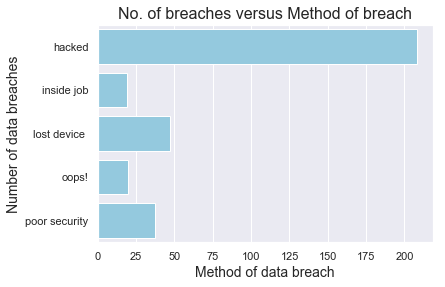

In [30]:
DIMS=(16, 6)
fig, ax1 = plt.subplots()

sns.barplot(y=df_method['METHOD'], x=df_method['No. of Breaches'], ax=ax1, color="skyblue")
ax1.set_xlabel('Method of data breach', fontsize=14)
ax1.set_ylabel('Number of data breaches', fontsize=14)
ax1.set_title("No. of breaches versus Method of breach", fontsize=16)
plt.show()

#### Observations: 

Most number of breaches in each of the years between 2015-2019 has been in the web sector. 

2015, 2016 saw lot more data breaches in health care and government sectors but the number of breaches in the subsequent years went down.

Most breaches were seen in 2018 in many of the sectors and most number of records were also compromised.

The peaks and dips in the number of breaches alternate in a cycle. This is perhaps due to new security methods getting hacked, and result in new peaks, followed by a dip with more robust security measures.
    
Hacking seems to be the most effective or most used method of data breach; similar to breaches seen in cryptocurrencies from 2018, as above.

The most number of breaches also occurred in 2018; similar to cryptocurrencies.

A fair number of data breaches occurred due to lost/stolen devices followed by poor security as cause of data breach.

oops! (Misc error - human negligence/error) which used to be one of the main reasons for data breach, is still contributing factor but has reduced in number.
  

### Section 2b: 
Impact of data breach on stock prices of selected stocks

In this section, we have analysed the change in stock prices of 3 companies that experienced data breach
- eBay
- Vodafone
- Adobe

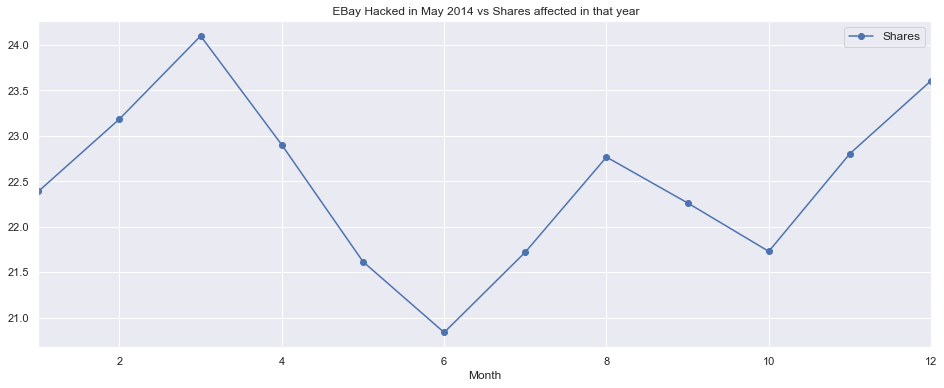

In [39]:
ebay_df = pd.read_csv('ebay.csv')
ebay_df.head()

def return_year(t):
    try:
        m, d, y = t.split('/')
        time_l = [int(v) for v in [ m, d, y ]]
        return time_l[2]
    except ValueError:
        return -1
def return_date(t):
    try:
        m, d, y = t.split('/')
        time_l = [int(v) for v in [ m, d, y ]]
        return time_l[0]
    except ValueError:
        return -1
    
ebay_df['o_year'] = ebay_df['Date'].apply(return_year)
#Retrieving data for 2014 year
ebay_df = ebay_df[ebay_df['o_year']== 2014]
ebay_df['o_Month'] = ebay_df['Date'].apply(return_date
                                          )
#Mean the stocks per month
ebay_df = ebay_df.groupby('o_Month')['Close'].mean().reset_index(name='Mean_stocks')
fig_dimensions=(16, 6)
fig = plt.figure(figsize = fig_dimensions)
ax = fig.add_subplot(111)
ebay_df.plot(x='o_Month', y='Mean_stocks', ax=ax, kind='line',marker="o")
ax.set_title(' EBay Hacked in May 2014 vs Shares affected in that year')
plt.xlabel("Month")

ax.legend(["Shares"], fontsize=12)

plt.show()

#### Observation: 
Ebay was hacked on May 2014 and shares are dripped over that time and it started to recover from July 2014.

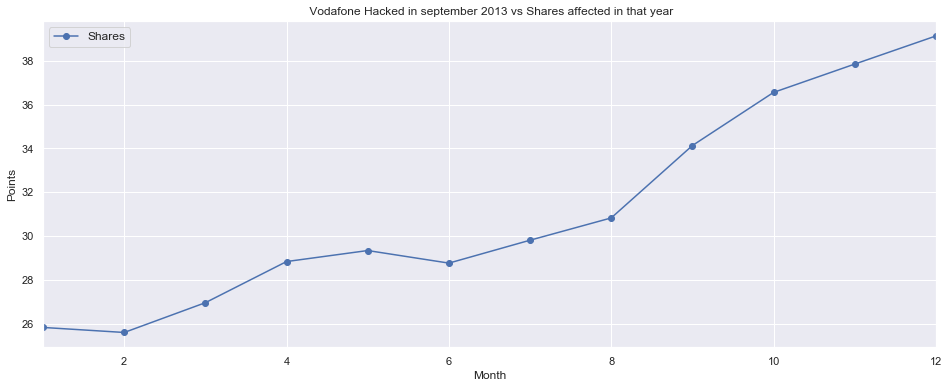

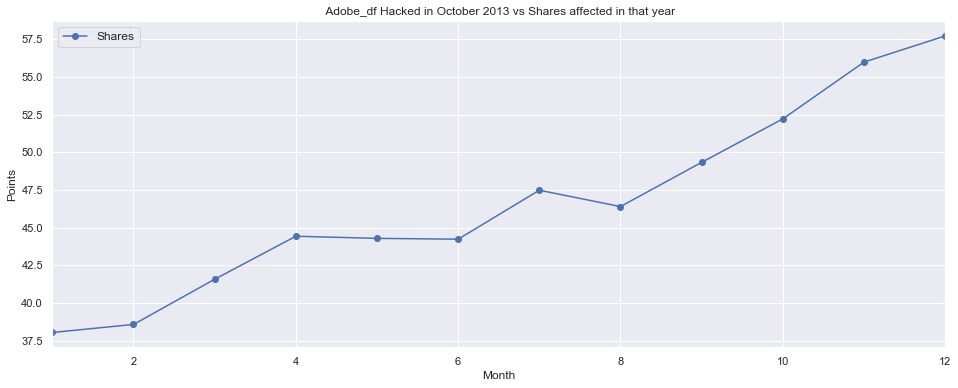

In [40]:
vod_df = pd.read_csv('vod.csv')
adbe_df = pd.read_csv('adbe.csv')

vod_df['o_year'] = vod_df['Date'].apply(return_year)
#Retrieving data for 2014 year
vod_df = vod_df[vod_df['o_year']== 2013]
vod_df['o_Month'] = vod_df['Date'].apply(return_date
                                          )
#Mean the stocks per month
vod_df = vod_df.groupby('o_Month')['Open'].mean().reset_index(name='Mean_stocks')
fig_dimensions=(16, 6)
fig = plt.figure(figsize = fig_dimensions)
ax = fig.add_subplot(111)
vod_df.plot(x='o_Month', y='Mean_stocks', ax=ax, kind='line',marker="o")
ax.set_title(' Vodafone Hacked in september 2013 vs Shares affected in that year')
plt.xlabel("Month")
plt.ylabel("Points")
ax.legend(["Shares"], fontsize=12)

plt.show()

adbe_df['o_year'] = adbe_df['Date'].apply(return_year)
#Retrieving data for 2014 year
adbe_df = adbe_df[adbe_df['o_year']== 2013]
adbe_df['o_Month'] = adbe_df['Date'].apply(return_date)
#Mean the stocks per month
adbe_df = adbe_df.groupby('o_Month')['Open'].mean().reset_index(name='Mean_stocks')
fig_dimensions=(16, 6)
fig = plt.figure(figsize = fig_dimensions)
ax = fig.add_subplot(111)
adbe_df.plot(x='o_Month', y='Mean_stocks', ax=ax, kind='line',marker="o")
ax.set_title(' Adobe_df Hacked in October 2013 vs Shares affected in that year')
plt.xlabel("Month")
plt.ylabel("Points")
ax.legend(["Shares"], fontsize=12)
plt.show()

#### Observations: 
Ebay was hacked on May 2014 and stock prices dipped over that time and it started to recover from July 2014.

Though Vodafone and Adobe hacked in 2013, stock price does not seem to have been affected.

### Section 3:
In this section we wanted to see if the impact of breaches on individual consumers - to see if consumers were taking steps to protect themselves from the impact of data breaches. 

For this, we selected a dataset related to 'Do Not Call Registry' from Singapore. Let's see if there is any trend or conclusion that can be derived from this dataset.


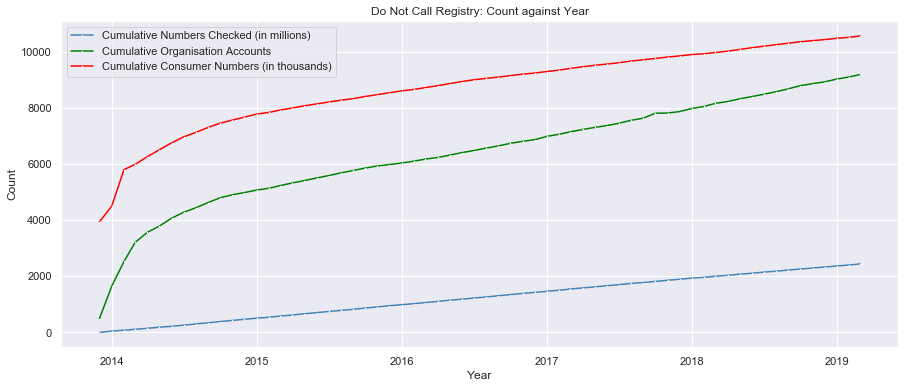

In [41]:
df_DNC = pd.read_csv('cumulative-dnc-registry-figures.csv', sep=',')
df_DNC1 = df_DNC.dropna()

df_DNC1['month'] = pd.to_datetime(df_DNC1['month'])
df_DNC1.groupby(df_DNC1['month'].dt.year)['cumulative_numbers_checked_million'].agg(['mean'])
df_DNC1['cumulative_consumer_numbers_thousands'] = df_DNC1['cumulative_consumer_numbers'].div(100).round(2)

fig = plt.figure(figsize=(15, 6))

ax1 = fig.add_subplot(1,1,1)

sns.lineplot(x=df_DNC1['month'], y=df_DNC1['cumulative_numbers_checked_million'], ax=ax1
           ,color="steelblue", marker='o', markersize=0.7)
sns.lineplot(x=df_DNC1['month'], y=df_DNC1['cumulative_organisation_accounts'], ax=ax1
           ,color="green", marker='o', markersize=0.7)
sns.lineplot(x=df_DNC1['month'], y=df_DNC1['cumulative_consumer_numbers_thousands'], ax=ax1
           ,color="red", marker='o', markersize=0.7)
ax1.set_ylabel("Count")
ax1.set_xlabel("Year")
ax1.set_title("Do Not Call Registry: Count against Year")

ax1.legend(["Cumulative Numbers Checked (in millions)", 
            "Cumulative Organisation Accounts", 
            "Cumulative Consumer Numbers (in thousands)"])

plt.show()

#### Conclusion

While there is an increasing trend in the cumulative numbers checked in the registry, in the cumulative organisation accounts, and in the cumulative consumer numbers, it is not determinative that instances of breaches in blockchain technology and compromises faced in the cryptocurrency sector would affect consumers' and companies' perspective in data privacy, and the prices of cryptocurrencies themselves.

Nonetheless, individuals, legislature, and organisations worldwide have been taking data privacy very seriously, and it is expected that stricter privacy laws will be expected in years to come.

### APPENDIX
Sources:
Datasets: kaggle
Blogs:
https://resources.infosecinstitute.com/security-vulnerabilities-of-cryptocurrency-exchanges/#gref
https://www.wired.com/story/hack-binance-cryptocurrency-exchange/
